In [20]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

import utils

In [21]:
# ROOT = r"D:\Database\animals\generated"
ROOT = r"D:\Database\animals\images"
MODEL_URL = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
MODEL_TYPE = "vit_h"
SAVEPATH = "./models"
DEVICE = "cuda:0"

In [22]:
import random


imagepaths = [
    os.path.join(ROOT, f) for f in os.listdir(ROOT) if f.endswith(('.jpg', '.jpeg', '.png'))
]

imagepaths = random.sample(imagepaths, 10)

In [23]:
from segment_anything import sam_model_registry, SamPredictor

# model_path = utils.download_model(MODEL_URL, SAVEPATH)
model_path = r"./models/sam_vit_h_4b8939.pth"

sam = sam_model_registry[MODEL_TYPE](checkpoint=model_path)
sam.to(device=DEVICE)

predictor = SamPredictor(sam)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


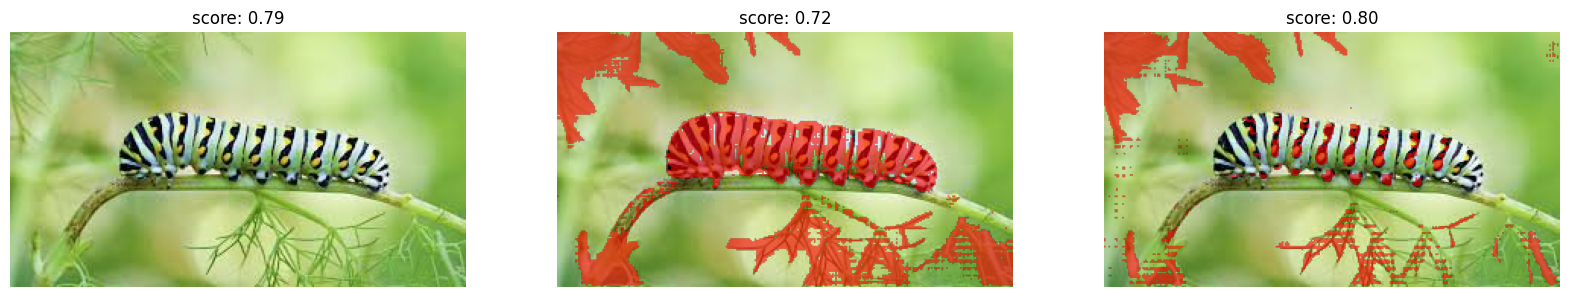

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


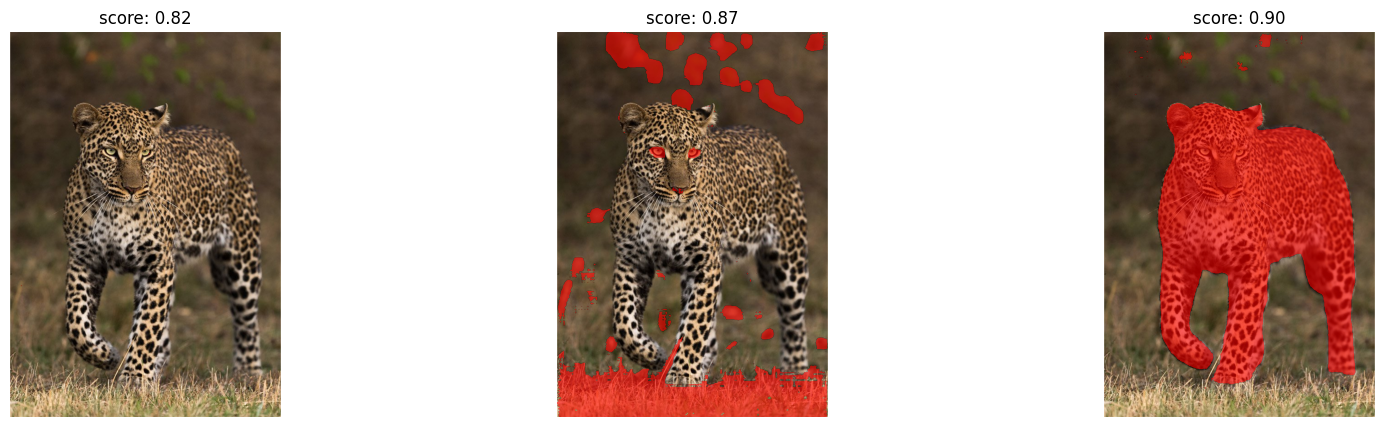

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


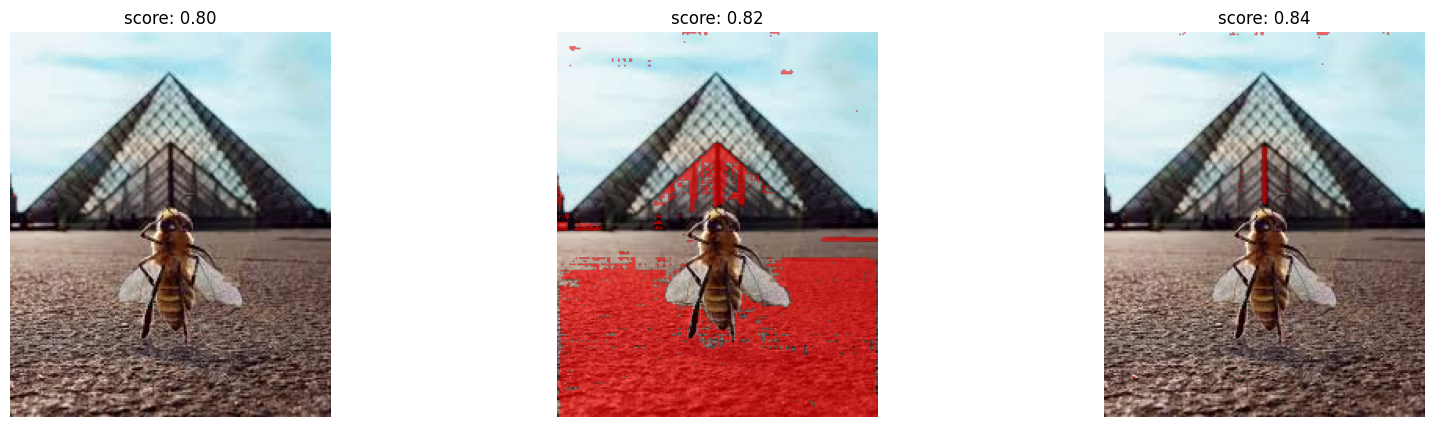

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


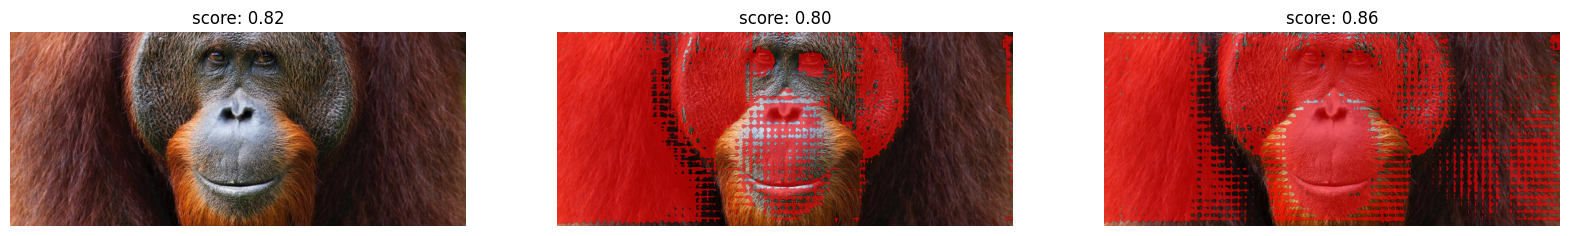

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


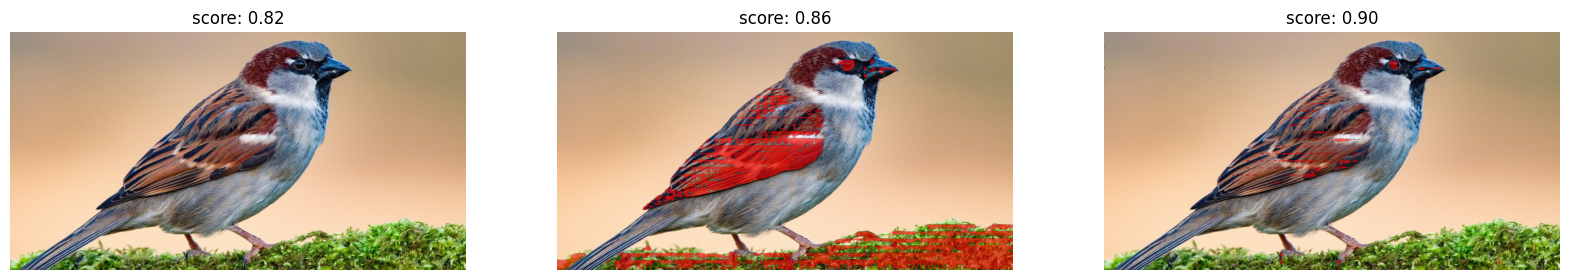

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


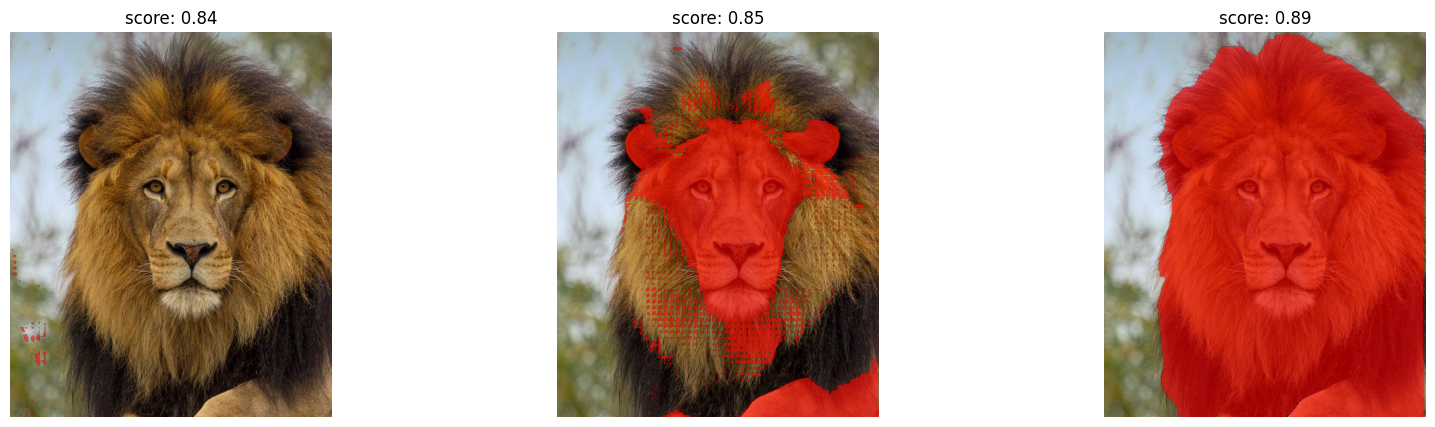

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


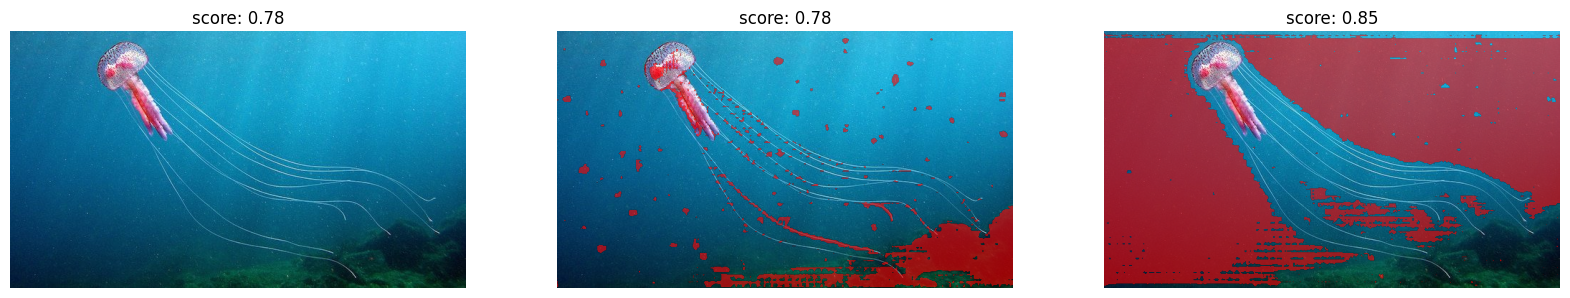

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


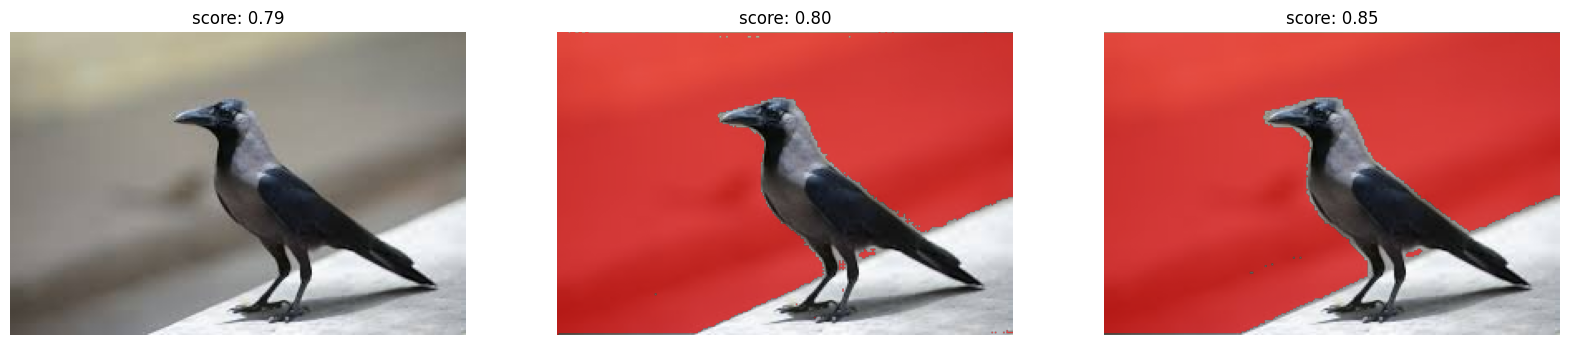

In [24]:
for imgp in imagepaths:
    img = cv2.imread(imgp)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # input_point = np.array([[np.random.randint(0, img.shape[0]), np.random.randint(0, img.shape[1])]])
    # input_label = np.array([1])
    predictor.set_image(img)
    # point grid 64x64 across the image
    input_points = np.array([[i, j] for i in np.linspace(0, img.shape[0], 64) for j in np.linspace(0, img.shape[1], 64)])
    input_labels = np.ones(input_points.shape[0], dtype=int)

    masks, scores, logits = predictor.predict(
        multimask_output=True,
        point_coords=input_points,
        point_labels=input_labels
    )

    fig, ax = plt.subplots(1, len(masks), figsize=(20, 5))
    for i, (mask, score) in enumerate(zip(masks, scores)):
        mask_img = utils.get_mask(mask)
        # utils.show_points(input_points, input_labels, ax[i])
        ax[i].imshow(img)
        ax[i].imshow(mask_img)
        ax[i].set_title(f"score: {score:.2f}")
        ax[i].axis("off")

    plt.show()